# Research AI Task 4

### Task: Predict price of cars from the given dataset using linear regression

**Step 1: Load libraries**

In [931]:
import pandas as pd

**Step 2: Load training data**

In [932]:
df= pd.read_csv("CarPrice_Assignment.csv")

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [933]:
df.shape

(205, 26)

In [934]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Step 3: Cleaning the dataframe**

In [935]:
df = df.drop(columns=['car_ID'])
df= df.drop(columns=['CarName'])

In [936]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [937]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [938]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [939]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [940]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [941]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [942]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [943]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [944]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [945]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [946]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

**Step 3: Data preprocessing**

In [947]:
# Handling missing values

df.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [948]:
# Binary + ordinal encoding

df['fueltype'] = df['fueltype'].map({'gas': 0, 'diesel': 1})
df['aspiration'] = df['aspiration'].map({'std': 0, 'turbo': 1})
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['enginelocation'] = df['enginelocation'].map({'front': 0, 'rear': 1})

cylinder_map = {
    'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'eight': 8, 'twelve': 12
}
df['cylindernumber'] = df['cylindernumber'].map(cylinder_map)

# One-hot encoding

nominal_cols = ['fuelsystem', 'enginetype', 'carbody', 'drivewheel']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

df.head()


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,False,False,True
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,False,False,True
2,1,0,0,2,0,94.5,171.2,65.5,52.4,2823,...,False,False,True,False,False,True,False,False,False,True
3,2,0,0,4,0,99.8,176.6,66.2,54.3,2337,...,True,False,False,False,False,False,True,False,True,False
4,2,0,0,4,0,99.4,176.6,66.4,54.3,2824,...,True,False,False,False,False,False,True,False,False,False


In [949]:
df.isnull().sum().sort_values(ascending=False)


symboling            0
enginetype_ohc       0
fuelsystem_idi       0
fuelsystem_mfi       0
fuelsystem_mpfi      0
fuelsystem_spdi      0
fuelsystem_spfi      0
enginetype_dohcv     0
enginetype_l         0
enginetype_ohcf      0
fuelsystem_2bbl      0
enginetype_ohcv      0
enginetype_rotor     0
carbody_hardtop      0
carbody_hatchback    0
carbody_sedan        0
carbody_wagon        0
drivewheel_fwd       0
fuelsystem_4bbl      0
price                0
fueltype             0
curbweight           0
aspiration           0
doornumber           0
enginelocation       0
wheelbase            0
carlength            0
carwidth             0
carheight            0
cylindernumber       0
highwaympg           0
enginesize           0
boreratio            0
stroke               0
compressionratio     0
horsepower           0
peakrpm              0
citympg              0
drivewheel_rwd       0
dtype: int64

In [950]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   fueltype           205 non-null    int64  
 2   aspiration         205 non-null    int64  
 3   doornumber         205 non-null    int64  
 4   enginelocation     205 non-null    int64  
 5   wheelbase          205 non-null    float64
 6   carlength          205 non-null    float64
 7   carwidth           205 non-null    float64
 8   carheight          205 non-null    float64
 9   curbweight         205 non-null    int64  
 10  cylindernumber     205 non-null    int64  
 11  enginesize         205 non-null    int64  
 12  boreratio          205 non-null    float64
 13  stroke             205 non-null    float64
 14  compressionratio   205 non-null    float64
 15  horsepower         205 non-null    int64  
 16  peakrpm            205 non

In [951]:
# Converting boolean values to integers

bool_cols= df.select_dtypes(include= 'bool').columns
df[bool_cols]= df[bool_cols].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   fueltype           205 non-null    int64  
 2   aspiration         205 non-null    int64  
 3   doornumber         205 non-null    int64  
 4   enginelocation     205 non-null    int64  
 5   wheelbase          205 non-null    float64
 6   carlength          205 non-null    float64
 7   carwidth           205 non-null    float64
 8   carheight          205 non-null    float64
 9   curbweight         205 non-null    int64  
 10  cylindernumber     205 non-null    int64  
 11  enginesize         205 non-null    int64  
 12  boreratio          205 non-null    float64
 13  stroke             205 non-null    float64
 14  compressionratio   205 non-null    float64
 15  horsepower         205 non-null    int64  
 16  peakrpm            205 non

In [952]:
# Train-test split

import numpy as np

np.random.seed(42)

X= df.drop('price', axis= 1).values
y= df['price'].values.reshape(-1,1) # -1 means NumPy figures out the no. of rows automatically and 1 means exactly 1 column

m= X.shape[0]  # no. of training examples

indices= np.random.permutation(m)

split= int(0.8* m)
train_idx= indices[:split]
test_idx= indices[split:]

X_train= X[train_idx]
X_test= X[test_idx]

y_train= y[train_idx]
y_test= y[test_idx]

**Step 4: Building the model**

In [953]:
# Standardising the features

mu= X_train.mean(axis=0)  # axis=0 means column-wise
sigma= X_train.std(axis=0)

sigma[sigma == 0] = 1

X_train= (X_train-mu)/sigma     #  Z-score
X_test= (X_test-mu)/sigma       #  Z-score

In [954]:
# Adding bias term (x0=1 for all training examples)

X_train= np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test= np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

In [955]:
# Cost function

def compute_cost(X, y, w):

    m= X.shape[0]
    pred= X @ w # @ means matrix multiplication in Python using NumPy
    cost= (1/(2*m)) * np.sum((pred - y)**2)

    return cost

In [956]:
# Gradient descent function

def gradient_descent(X, y, w, alpha, iters):

    m= X.shape[0]
    cost_hist= []

    for i in range(iters):
        dj_dw= (1/m) * X.T @ (X @ w - y)
        w= w - alpha * dj_dw
        cost= compute_cost(X, y, w)

        if i % 100 == 0:
            print(f"Iteration {i+1}: Cost {cost}")

        cost_hist.append(cost)

    return w, cost_hist

**Step 5: Training the model**

In [957]:
# Initialising weights

w= np.zeros((X_train.shape[1], 1))  # shape= (no. of features, 1)

In [958]:
alpha= 0.095
iters= 400

theta, cost_history= gradient_descent(X_train, y_train, w, alpha, iters)

Iteration 1: Cost 76316398.21410696
Iteration 101: Cost 2710889.8407918345
Iteration 201: Cost 2528144.5409684395
Iteration 301: Cost 2435857.237960999


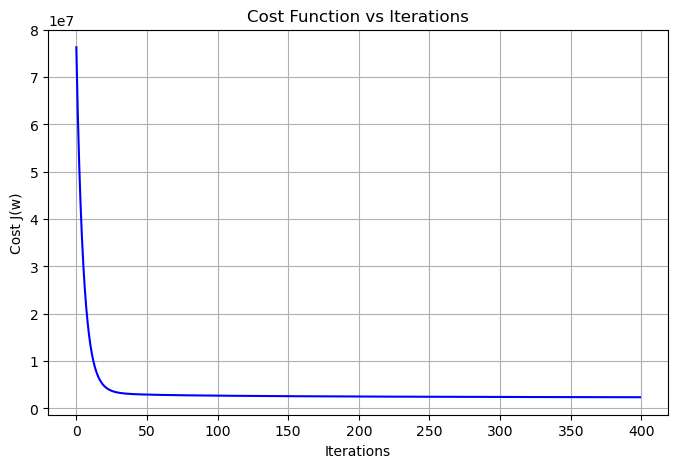

In [959]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost J(w)')
plt.title('Cost Function vs Iterations')
plt.grid(True)

plt.show()

**Step 6: Evaluating the model**

In [960]:
y_pred= X_test @ theta

In [961]:
mse= np.mean((y_pred-y_test)**2)
rmse= np.sqrt(mse)
r2= 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

print(f"MSE: {mse} \nRMSE: {rmse} \nR2: {r2}")

MSE: 9768102.724045996 
RMSE: 3125.3964107047277 
R2: 0.8740295831702344


### Conclusion from the metrics

Using a learning rate of α = 0.095 and 400 iterations, the linear regression model was trained on 80% of the dataset and evaluated on the remaining 20%. The model achieved an RMSE of approximately INR 3,125 and an R² score of about 0.87 on the test set.

Given that car prices in the dataset range roughly from INR 5,000 to INR 45,000, an average prediction error of around INR 3,000 is reasonable and indicates good predictive performance. The R² value suggests that the model explains approximately 87% of the variability in car prices, showing that the model generalises well to unseen data despite using a relatively simple linear approach.

Overall, these results demonstrate that a linear regression model implemented from scratch using gradient descent can effectively capture the relationship between vehicle features and car prices without relying on high-level machine learning libraries.